In [1]:
!pip install pystan

  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-5.0.2-cp310-cp310-win_amd64.whl (155 kB)
  Using cached aiohttp-3.8.4-cp310-cp310-win_amd64.whl (319 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished w

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\DevlinCortens\AppData\Local\Temp\pip-install-hb_spebw\pystan_72c0da0639d94bd19121759c6f6e22c1\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip install prophet

In [ ]:
import pandas as pd
import datetime as dt
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as web

start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()

data = web.get_data_yahoo("TSLA", start, end)

data.to_csv("stock_data.csv")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data = pd.read_csv("stock_data.csv")

In [ ]:
data = data[["Date", "Close"]]

In [ ]:
data

,Date,Close
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334
...,...,...
809,2023-03-21,197.580002
810,2023-03-22,191.149994
811,2023-03-23,192.220001
812,2023-03-24,190.410004


In [ ]:
data.columns = ["ds", "y"]

In [ ]:
data

,ds,y
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334
...,...,...
809,2023-03-21,197.580002
810,2023-03-22,191.149994
811,2023-03-23,192.220001
812,2023-03-24,190.410004


In [ ]:
from prophet import Prophet

In [ ]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9w4cm__3/clz6fz3a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9w4cm__3/ugt9v76n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=923', 'data', 'file=/tmp/tmp9w4cm__3/clz6fz3a.json', 'init=/tmp/tmp9w4cm__3/ugt9v76n.json', 'output', 'file=/tmp/tmp9w4cm__3/prophet_modelxrw2rf5b/prophet_model-20230327154729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:47:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:47:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = prophet.make_future_dataframe(periods=7)
predictions = prophet.predict(future_dates)

In [ ]:
from prophet.plot import plot_plotly

plot_plotly(prophet, predictions)

In [ ]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,23.294659,-24.402387,54.138775,23.294659,23.294659,-7.580924,-7.580924,-7.580924,-21.296958,...,-1.507752,-1.507752,-1.507752,15.223785,15.223785,15.223785,0.0,0.0,0.0,15.713735
1,2020-01-03,23.827534,-22.447190,54.084953,23.827534,23.827534,-6.714489,-6.714489,-6.714489,-21.296958,...,-2.424360,-2.424360,-2.424360,17.006828,17.006828,17.006828,0.0,0.0,0.0,17.113045
2,2020-01-06,25.426156,-10.806033,64.532110,25.426156,25.426156,1.224927,1.224927,1.224927,-21.296958,...,0.626493,0.626493,0.626493,21.895392,21.895392,21.895392,0.0,0.0,0.0,26.651083
3,2020-01-07,25.959030,-14.261836,65.611263,25.959030,25.959030,0.757939,0.757939,0.757939,-21.296958,...,-1.221621,-1.221621,-1.221621,23.276517,23.276517,23.276517,0.0,0.0,0.0,26.716969
4,2020-01-08,26.491904,-10.587444,69.074405,26.491904,26.491904,2.402212,2.402212,2.402212,-21.296958,...,-0.796981,-0.796981,-0.796981,24.496151,24.496151,24.496151,0.0,0.0,0.0,28.894117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2023-03-30,145.921840,99.927467,178.874007,145.921840,145.921840,-6.751080,-6.751080,-6.751080,-21.296958,...,-1.507752,-1.507752,-1.507752,16.053630,16.053630,16.053630,0.0,0.0,0.0,139.170761
817,2023-03-31,145.315125,99.715476,175.608244,145.315125,145.315125,-7.946457,-7.946457,-7.946457,-21.296958,...,-2.424360,-2.424360,-2.424360,15.774860,15.774860,15.774860,0.0,0.0,0.0,137.368668
818,2023-04-01,144.708410,102.675316,179.469707,144.708410,144.708410,-3.226719,-3.226719,-3.226719,-21.296958,...,2.662109,2.662109,2.662109,15.408130,15.408130,15.408130,0.0,0.0,0.0,141.481691
819,2023-04-02,144.101694,101.197121,179.056346,144.101694,144.101694,-3.664248,-3.664248,-3.664248,-21.296958,...,2.662112,2.662112,2.662112,14.970598,14.970598,14.970598,0.0,0.0,0.0,140.437446


In [ ]:
predictions["yhat"][-5:]

816    139.170761
817    137.368668
818    141.481691
819    140.437446
820    137.304996
Name: yhat, dtype: float64

In [ ]:
import random
import numpy as np
from numpy.random import multinomial
#Takes the prediction of the last X days
pos_week = predictions["yhat"][-365:]

#Empty array to store the 5 week prediction with weights
new_vals = []

#Generate random number which will be a used to base the weights 
#Really positive will be the maybe 0.03 to 0.05, really negative will be maybe -0.03 to -0.05

#multinomial("PERCENT INCREASE WANTED OVER TIME PERIOD", [1/"NEEDS TO BE SAME NUMBER AS DAYS".], * "NEEDS TO BE SAME NUMBER AS DAYS")
values = multinomial(22, [1/365.] * 365)
# divide by 100 to make the values .0something 
values = values / 100

#multinomial("AMOUNT OF NEGATIVE NUMBERS THROWN IN", [1/"NEEDS TO BE SAME NUMBER AS DAYS".], * "NEEDS TO BE SAME NUMBER AS DAYS")
negative_values = multinomial(13, [1/365.] * 365)
negative_values -= negative_values * 2
negative_values = negative_values / 100
beta = values + negative_values
for i,x in enumerate(pos_week):
  if i == 0:
    y = x + x * (beta[i])
    new_vals.append(y)
  else:
    #Take the value of the day before and add the product of itself times the beta and append to the new list
    y = new_vals[i - 1] + new_vals[i - 1] * (beta[i])
    new_vals.append(y)

<Axes: >

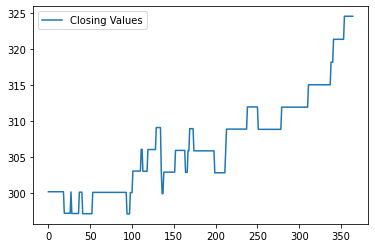

In [ ]:
newer_vals = pd.DataFrame(new_vals, columns= ["Closing Values"])
newer_vals.plot()